# NMF SFH vs parametric SFH
In this notebook I will compare the prior imposed on SFRs by the NMF SFH versus the standard parametric SFH

In [1]:
import os, h5py
import numpy as np 
# --- gpc_mc --- 
from gqp_mc import data as Data 
from gqp_mc import fitters as Fitters

In [2]:
# --- plotting --- 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [3]:
n_sample = 10000

# parametric SFH model

In [4]:
ifsps = Fitters.iFSPS(model_name='vanilla')

In [5]:
# sample prior
prior_fsps = ifsps._default_prior()
prior_fsps_sample = np.array([prior_fsps() for i in range(n_sample)])

In [6]:
# we want SSFR not SFR so lets set M* to 1
prior_fsps_sample[:,0] = 0.
prior_fsps_sample[:,1] = 0.
prior_fsps_sample[:,2] = 0.

In [7]:
ssfr_fsps_1gyr = ifsps.get_SFR(prior_fsps_sample.T, 0.1, dt=1.)
ssfr_fsps_100myr = ifsps.get_SFR(prior_fsps_sample.T, 0.1, dt=0.1)

In [8]:
logssfr_fsps_1gyr = np.log10(ssfr_fsps_1gyr)
logssfr_fsps_100myr = np.log10(ssfr_fsps_100myr)

/opt/anaconda3/envs/gqp/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/opt/anaconda3/envs/gqp/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


Text(0.5, 0.98, 'prior on SFR from $\\tau$ parameterized SFH')

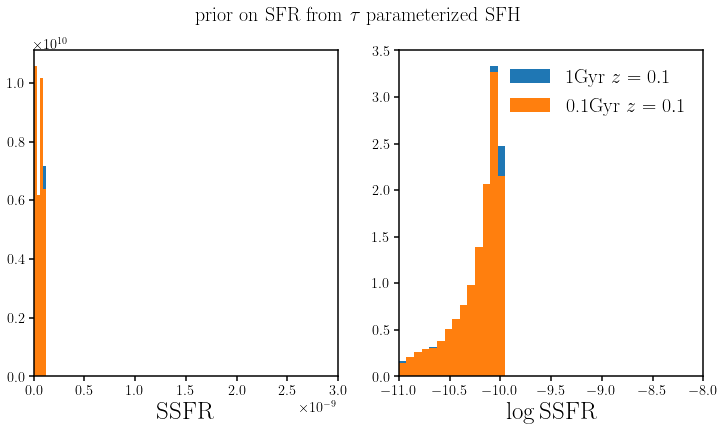

In [9]:
fig = plt.figure(figsize=(12,6))
sub = fig.add_subplot(121)
sub.hist(ssfr_fsps_1gyr, range=[0, 3e-9], bins=100, density=True, label='SSFR 1Gyr $z=0.1$')
sub.hist(ssfr_fsps_100myr, range=[0, 3e-9], bins=100, density=True, label='SSFR 0.1Gyr $z=0.1$')
sub.set_xlabel(r'${\rm SSFR}$', fontsize=25)
sub.set_xlim(0, 3e-9)

sub = fig.add_subplot(122)
sub.hist(logssfr_fsps_1gyr, range=[-11, -8], bins=40, density=True, label='1Gyr $z=0.1$')
sub.hist(logssfr_fsps_100myr, range=[-11, -8], bins=40,density=True, color='C1', label='0.1Gyr $z=0.1$')
sub.legend(loc='upper right', fontsize=20)
sub.set_xlabel(r'$\log {\rm SSFR}$', fontsize=25)
sub.set_xlim(-11, -8)
fig.suptitle(r'prior on SFR from $\tau$ parameterized SFH', fontsize=20)

# NMF SFH

In [10]:
ispec = Fitters.iSpeculator()

In [11]:
bp1 = np.random.uniform(size=n_sample)
bp2 = np.random.uniform(size=n_sample)
bp3 = np.random.uniform(size=n_sample)
bp4 = np.random.uniform(size=n_sample)

# warped manifold transform
beta_arr = ispec._transform_to_SFH_basis(np.array([bp1, bp2, bp3, bp4]).T)
# betas
b1, b2, b3, b4 = beta_arr.T

ssfr_nmf_1gyr = ispec.get_SFR(np.array([np.ones(len(b1)), b1, b2, b3, b4]), 0.1, dt=1.)
ssfr_nmf_100myr = ispec.get_SFR(np.array([np.ones(len(b1)), b1, b2, b3, b4]), 0.1, dt=0.1)

logssfr_nmf_1gyr = np.log10(ssfr_nmf_1gyr)
logssfr_nmf_100myr = np.log10(ssfr_nmf_100myr)

Text(0.5, 0.98, 'prior on SFR from NMF SFH')

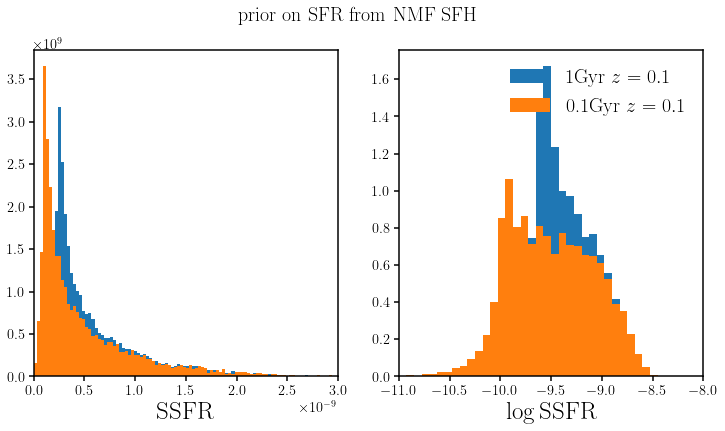

In [12]:
fig = plt.figure(figsize=(12,6))
sub = fig.add_subplot(121)
sub.hist(ssfr_nmf_1gyr, range=[0, 3e-9], bins=100, density=True, label='SSFR 1Gyr $z=0.1$')
sub.hist(ssfr_nmf_100myr, range=[0, 3e-9], bins=100, density=True, label='SSFR 0.1Gyr $z=0.1$')
sub.set_xlabel(r'${\rm SSFR}$', fontsize=25)
sub.set_xlim(0, 3e-9)

sub = fig.add_subplot(122)
sub.hist(logssfr_nmf_1gyr, range=[-11, -8], bins=40, density=True, label='1Gyr $z=0.1$')
sub.hist(logssfr_nmf_100myr, range=[-11, -8], bins=40,density=True, color='C1', label='0.1Gyr $z=0.1$')
sub.legend(loc='upper right', fontsize=20)
sub.set_xlabel(r'$\log {\rm SSFR}$', fontsize=25)
sub.set_xlim(-11, -8)
fig.suptitle(r'prior on SFR from NMF SFH', fontsize=20)